In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder



# **1. Nạp dữ liệu và hiển thị 5 dòng đầu tiên**

In [ ]:
# Đọc file CSV chứa dữ liệu Titanic vào DataFrame
df = pd.read_csv("data/Titanic_train.csv")
    
# Hiển thị 5 dòng đầu tiên để xem cấu trúc dữ liệu
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **2. Xác định có bao nhiêu cột bao nhiêu dòng**

In [ ]:
# Kiểm tra kích thước của DataFrame
df.shape


(891, 12)

In [ ]:
# Hiển thị thông tin tổng quan về DataFrame bao gồm: tên cột, kiểu dữ liệu, số giá trị non-null, bộ nhớ sử dụng
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Có 891 hành khách, mỗi hành khách có 12 đặc trưng. 
=> Đây là dữ liệu vừa, với các kiểu dữ liệu là số (tuổi Age, giá vé Fare), dữ liệu phân loại (giới tính sex, embarked cảng lên tàu) và text (tên name, mã vé ticket)

# **3. Thống kê các cột dạng số (describe()), đếm giá trị thiếu**

## 3.1. Thống kê các cột dạng số

In [ ]:
# Thống kê mô tả các cột dạng số (numeric)
df.describe(include=[np.number])


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Age có trung bình khoảng 29 tuổi, nhưng min là 0.42, max là 80 => có giá trị ngoại lai (0.42 là trẻ sơ sinh).
Fare trung bình khoảng 32, nhưng max tới 512 => chênh lệch quá lớn, do đó cần chuẩn hóa.

## 3.2 Đếm các giá trị bị thiếu

In [ ]:
# Đếm số lượng giá trị bị thiếu (NaN) trong mỗi cột
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age thiếu 177 người => điền giá trị trung vị median 
Cabin thiếu 687 => loại bỏ cột này vì thiếu gần 80%, quá nhiều
Embarked thiếu 2 => có thể điền giá trị phổ biến nhất.

# **4. Vẽ histogram cho thuộc tính Age và boxplot cho Fare.**

## 4.1. Histogram cho thuộc tính Age

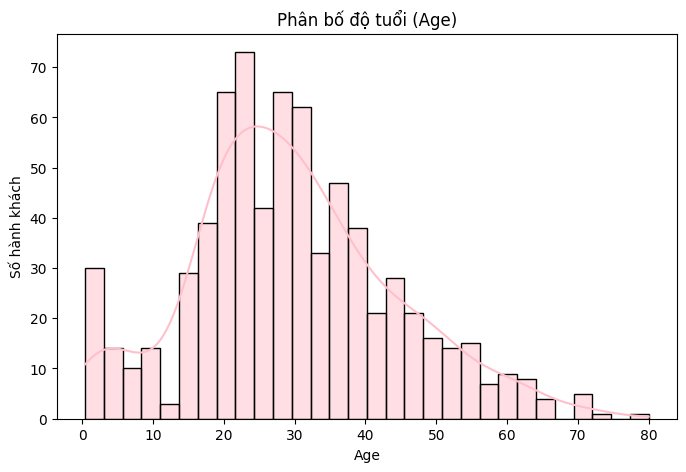

In [ ]:
# Vẽ histogram cho cột Age để xem phân bố độ tuổi

# Tạo figure với kích thước 8x5 inch
plt.figure(figsize=(8,5))

# Vẽ histogram với đường KDE (Kernel Density Estimation)
# bins=30: chia dữ liệu thành 30 khoảng
# kde=True: hiển thị đường cong mật độ
sns.histplot(df["Age"], bins=30, kde=True, color='pink')

# Thêm tiêu đề và nhãn trục
plt.title("Phân bố độ tuổi (Age)")
plt.xlabel("Age")
plt.ylabel("Số hành khách")

# Hiển thị biểu đồ
plt.show()


Chọn Histogram cho Age vì đây là công cụ chuẩn để xem phân phối tần suất dữ liệu số liên tục. 
Age là biến liên tục, giá trị trải dài từ 0,1,2 .. 80, nhờ histogram chia dải tuổi thành các khoảng dễ thấy được bao nhiêu người trong mỗi khoảng tuổi, dữ liệu có đối xứng không hay lệch, có missing range không?
=> Biểu đồ cho thấy Age lệch sang trái nhẹ, nhiều người trẻ hơn, phổ biến nhất là hành khách từ 20 đến 40 tuổi, khá nhiều trẻ sơ sinh và vài người cao tuổi.

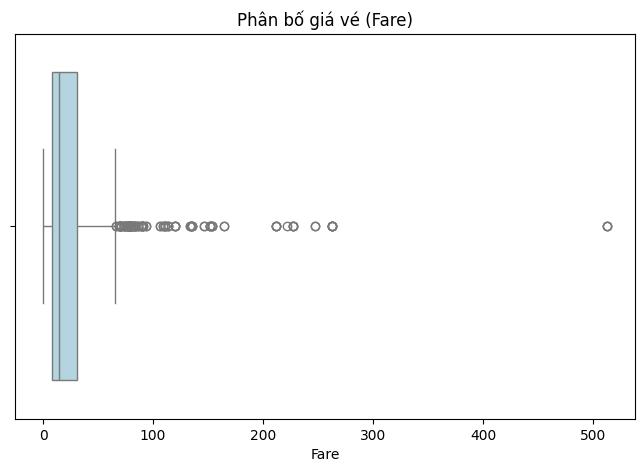

In [ ]:
# Vẽ boxplot cho cột Fare để phát hiện ngoại lai và xem phân bố

# Tạo figure với kích thước 8x5 inch
plt.figure(figsize=(8,5))

# Vẽ boxplot ngang
# x=df["Fare"]: dữ liệu cần vẽ
sns.boxplot(x=df["Fare"], color='lightblue')

# Thêm tiêu đề và nhãn
plt.title("Phân bố giá vé (Fare)")
plt.xlabel("Fare")

# Hiển thị biểu đồ
plt.show()


Box xanh là vùng 50% dữ liệu trung tâm giữa Q1 (25%) và Q3 (75%) => Box nằm sát về phía 0-50 nghĩa là phần lớn hành khách trả vé rẻ (0-50 bảng Anh) => Hành khách hạng 3 chiếm đa số.
Đường trung vị giữa hộp chia dữ liệu làm 2 nửa => nằm gần đáy hộp cho thấy phân bố lệch phải (median thấp hơn tb) (người trả ít tiền thì nhiều, còn người trả nhiều tiền thì ít) => Nên chuẩn hóa hoặc biến đổi log(Fare) khi dùng cho mô hình
Râu hộp whispers là hai đoạn thẳng mảnh kéo ra 2 bên mở rộng đến gái trị nằm trong khoảng hợp lí => Râu bên phải kéo dài hơn râu bên trái → chứng tỏ có một số người mua vé cao bất thường.
Các chấm nằm ngoài râu hộp là ngoại lai outliers và các giá trị cao bất thường so với phần lớn dữ liệu. => Nhiều chấm rời rạc bên phải (ở 100, 200, 300, 500) → các ngoại lai dương (high outliers) — chính là vé hạng 1 hoặc suite đặc biệt, Hành khách hạng 1 (giàu, có khả năng sống sót cao hơn) => Cần kiểm tra xem là hợp lý hay lỗi nhập liệu

# **5. Điền giá trị trung vị cho Age bị thiếu.**

Chọn trung vị thay vì trung bình là vì Trung vị (median) không bị ảnh hưởng bởi ngoại lai. Trong Titanic, Age có vài giá trị cực lớn và cực nhỏ → nếu dùng mean, kết quả sẽ lệch.

## 5.1 Kiểm tra lại giá trị thiếu 

In [ ]:
# Kiểm tra số lượng giá trị thiếu trong cột Age trước khi điền giá trị
df["Age"].isnull().sum()


np.int64(177)

## 5.2 Điền trung vị cho các giá trị còn thiếu 

In [ ]:
# Tính giá trị trung vị của cột Age
median_age = df["Age"].median()
print("Giá trị trung vị của Age:", median_age)

# Điền giá trị trung vị vào các ô bị thiếu
df["Age"].fillna(median_age, inplace=True)


Giá trị trung vị của Age: 28.0


C:\Users\FPTSHOP\AppData\Local\Temp\ipykernel_18540\2078661262.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(median_age, inplace=True)


## 5.3 Kiểm tra lại 

In [ ]:
# Kiểm tra lại số lượng giá trị thiếu trong cột Age
df["Age"].isnull().sum()


np.int64(0)

# **6. Chuẩn hóa các cột Age và Fare.**

Chuẩn hóa 2 cột này vì nó có 2 thang giá trị khác nhau, nếu đưa vào model thì model sẽ nghiên về cột có giá trị lớn hơn, làm mất cân bẳng và ảnh hướng đến các đặc trưng khác. Và chọn StandardScaler vì Age và Fare đều là giá trị liên tục và không bị giới hạn tự nhiên.

In [ ]:
# Chuẩn hóa các cột Age và Fare bằng StandardScaler

# Khởi tạo đối tượng StandardScaler
scaler = StandardScaler()

# Danh sách các cột cần chuẩn hóa
cols_to_scale = ["Age", "Fare"]

# fit_transform(): tính mean và std, sau đó chuẩn hóa
# Ghi đè các cột đã chuẩn hóa vào DataFrame
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

# Hiển thị 5 dòng đầu để kiểm tra kết quả
df[cols_to_scale].head()


,Age,Fare
0,-0.565736,-0.502445
1,0.663861,0.786845
2,-0.258337,-0.488854
3,0.433312,0.420730
4,0.433312,-0.486337


# **7. Mã hóa các cột phân loại (Sex, Embarked)**

In [ ]:
# Để xem dữ liệu trước khi mã hóa
df[["Sex","Embarked"]].head()


,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S


=> dạng dữ liệu phân loại
Các thuật toán học máy (như Logistic Regression, SVM, Random Forest…) không hiểu dữ liệu dạng chữ,
vì chúng chỉ tính toán trên giá trị số (numeric).
→ Do đó, ta cần chuyển chữ thành số nhưng vẫn giữ ý nghĩa của từng loại.

In [ ]:
# Mã hóa các cột phân loại thành dạng số

# Mã hóa cột Sex bằng LabelEncoder
# LabelEncoder: chuyển nhãn phân loại thành số nguyên (0, 1, 2,...)
le = LabelEncoder()
# fit_transform(): học các nhãn và chuyển đổi
# male=0, female=1 (hoặc ngược lại tùy thứ tự)
df["Sex"] = le.fit_transform(df["Sex"])

# Mã hóa cột Embarked bằng One-Hot Encoding
# get_dummies(): tạo các cột nhị phân cho mỗi giá trị
# drop_first=True: bỏ cột đầu tiên để tránh multicollinearity
# Tạo ra Embarked_Q và Embarked_S (Embarked_C được bỏ)
df = pd.get_dummies(df, columns=["Embarked"], drop_first=True)

# Hiển thị kết quả sau khi mã hóa
df[["Sex", "Embarked_Q", "Embarked_S"]].head()


,Sex,Embarked_Q,Embarked_S
0,1,False,True
1,0,False,False
2,0,False,True
3,0,False,True
4,1,False,True


Sex → mã hóa nhị phân (LabelEncoder) => Sex: 1 = female, 0 = male
Embarked → mã hóa One-Hot (3 giá trị) => Embarked_Q, Embarked_S: 1 nếu hành khách lên ở cảng đó, ngược lại 0
(Cảng còn lại — C — bị bỏ làm “chuẩn” để tránh trùng lặp thông tin).

In [ ]:
# Để kiểm tra kết quả sau tất cả các bước tiền xử lý
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,-0.565736,1,0,A/5 21171,-0.502445,NaN,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.663861,1,0,PC 17599,0.786845,C85,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,-0.258337,0,0,STON/O2. 3101282,-0.488854,NaN,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.433312,1,0,113803,0.420730,C123,False,True
4,5,0,3,"Allen, Mr. William Henry",1,0.433312,0,0,373450,-0.486337,NaN,False,True


# **8. Lưu tập dữ liệu sau xử lý thành titanic_clean.csv.**

In [ ]:
# Lưu DataFrame đã xử lý vào file CSV mới
df.to_csv("titanic_clean.csv", index=False)
print("Đã lưu thành công vào file titanic_clean.csv")


Đã lưu thành công vào file titanic_clean.csv


# **9.Tính Accuracy, Precision, Recall, F1 cho mô hình Decision Tree và Logistic Regression.**

## 9.1. Chuẩn bị Dữ liệu cho Học máy

Trước khi huấn luyện model thì cần xác định rõ **biến mục tiêu (y)** và các **biến đặc trưng (X)**. Trong đó PassengerId, Name, Ticket, và Cabin không hữu ích cho việc dự đoán nên loại bỏ khỏi X.
=> Survived là biến mục tiêu y.
=> Các đặc trưng (X): Pclass, Sex, Age, SibSp, Parch, Fare, Embarked_Q, Embarked_S.

### **Định nghĩa Đặc trưng ($\mathbf{X}$) và Mục tiêu ($\mathbf{y}$)**

In [ ]:
# Tách biến mục tiêu (y) và các đặc trưng (X)

# y: biến cần dự đoán (Survived: 0=chết, 1=sống sót)
y = df["Survived"]

# X: các đặc trưng dùng để dự đoán
# Loại bỏ các cột không cần thiết: PassengerId, Name, Ticket, Cabin, Survived
# axis=1: xóa theo cột
X = df.drop(["PassengerId", "Name", "Ticket", "Cabin", "Survived"], axis=1)


## 9.2. Chia Dữ liệu (Train-Test Split)

In [ ]:
# Chia dữ liệu thành tập huấn luyện (train) và tập kiểm tra (test)
# X_train, y_train: dùng để huấn luyện mô hình
# X_test, y_test: dùng để đánh giá mô hình
# test_size=0.2: 20% dữ liệu cho test, 80% cho train
# random_state=42: đảm bảo kết quả có thể tái lập
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 9.4. Huấn luyện Mô hình, Dự đoán và đánh giá

### **Logistic Regression**

Huấn luyện mô hình và dự đoán 

In [ ]:
# Huấn luyện mô hình Logistic Regression

# Khởi tạo mô hình Logistic Regression
log_reg_model = LogisticRegression()

# fit(): huấn luyện mô hình với dữ liệu train
log_reg_model.fit(X_train, y_train)

# predict(): dự đoán nhãn cho dữ liệu test
y_pred_logreg = log_reg_model.predict(X_test)


Vẽ Ma trận Nhầm lẫn (Confuse Matrix)

[[90 15]
 [19 55]]


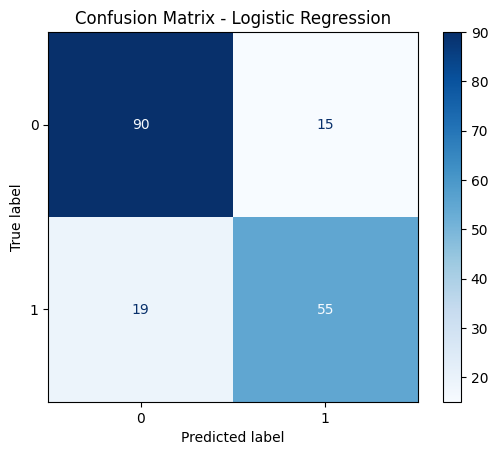

In [ ]:
# Tạo và hiển thị ma trận nhầm lẫn (Confusion Matrix)

# Tính ma trận nhầm lẫn từ giá trị thực tế và dự đoán
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
print(cm_logreg)

# Vẽ ma trận nhầm lẫn dưới dạng heatmap
ConfusionMatrixDisplay.from_estimator(log_reg_model, X_test, y_test, cmap=plt.cm.Blues)

# Thêm tiêu đề
plt.title("Confusion Matrix - Logistic Regression")

# Hiển thị biểu đồ
plt.show()


Đánh giá chỉ số hiệu suất quan trọng

In [ ]:
# Tính toán các chỉ số đánh giá cho mô hình Logistic Regression

# Accuracy: tỉ lệ dự đoán đúng trên tổng số dự đoán
accuracy_score_logreg = accuracy_score(y_test, y_pred_logreg)

# Precision: trong số dự đoán positive, bao nhiêu là đúng
# Tránh false positive
precision_score_logreg = precision_score(y_test, y_pred_logreg)

# Recall: trong số thực tế positive, bao nhiêu được tìm thấy
# Tránh false negative
recall_score_logreg = recall_score(y_test, y_pred_logreg)

# F1-Score: trung bình điều hòa của precision và recall
f1_score_logreg = f1_score(y_test, y_pred_logreg)

# In kết quả với 4 chữ số thập phân
print(f"Logistic Regression - Accuracy: {accuracy_score_logreg:.4f}, Precision: {precision_score_logreg:.4f}, Recall: {recall_score_logreg:.4f}, F1-Score: {f1_score_logreg:.4f}")


Logistic Regression - Accuracy: 0.8101, Precision: 0.7857, Recall: 0.7432, F1-Score: 0.7639


Phân tích kết quả:
- Accuracy là 81.01%: Mô hình dự đoán đúng khoảng 81% trường hợp.
- Precision (78.57%): Trong số những người mô hình dự đoán là sống sót, khoảng 78.57% dự đoán là đúng.
- Recall (72.97%): Trong số những người thực sự sống sót, mô hình tìm được (dự đoán đúng) 72.97% trong số họ.
- F1-Score (76.39%): Mô hình có một mức hiệu suất dự đoán cân bằng ở mức 76.39%.

### **Decision Tree**

Huấn luyện mô hình và dự đoán

In [ ]:
# Huấn luyện mô hình Decision Tree

# Import thư viện Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Khởi tạo mô hình Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# fit(): huấn luyện mô hình với dữ liệu train
dt_model.fit(X_train, y_train)

# predict(): dự đoán nhãn cho dữ liệu test
y_pred_dt = dt_model.predict(X_test)


Vẽ ma trận nhầm lẫn

[[86 19]
 [19 55]]


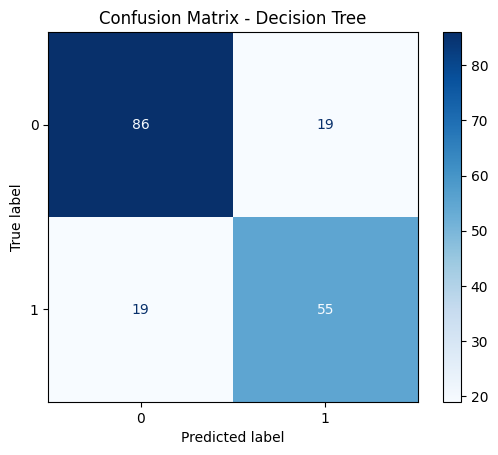

In [ ]:
# Tạo và hiển thị ma trận nhầm lẫn cho Decision Tree

# Tính ma trận nhầm lẫn
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)

# Vẽ ma trận nhầm lẫn dưới dạng heatmap
ConfusionMatrixDisplay.from_estimator(dt_model, X_test, y_test, cmap=plt.cm.Blues)

# Thêm tiêu đề
plt.title("Confusion Matrix - Decision Tree")

# Hiển thị biểu đồ
plt.show()


Đánh giá chỉ số hiệu suất

In [ ]:
# Tính toán các chỉ số đánh giá cho mô hình Decision Tree

# Accuracy: tỉ lệ dự đoán đúng
accuracy_score_dt = accuracy_score(y_test, y_pred_dt)

# Precision: độ chính xác khi dự đoán positive
precision_score_dt = precision_score(y_test, y_pred_dt)

# Recall: khả năng tìm thấy các trường hợp positive
recall_score_dt = recall_score(y_test, y_pred_dt)

# F1-Score: cân bằng giữa precision và recall
f1_score_dt = f1_score(y_test, y_pred_dt)

# In kết quả với 4 chữ số thập phân
print(f"Decision Tree - Accuracy: {accuracy_score_dt:.4f}, Precision: {precision_score_dt:.4f}, Recall: {recall_score_dt:.4f}, F1-Score: {f1_score_dt:.4f}")


Decision Tree - Accuracy: 0.7877, Precision: 0.7432, Recall: 0.7432, F1-Score: 0.7432


Phân tích kết quả:
- Accuracy là 78.77%: Mô hình dự đoán đúng khoảng 78.77% trường hợp.
- Precision (74.32%): Trong số những người mô hình dự đoán là sống sót, khoảng 74.32% dự đoán là đúng.
- Recall (74.32%): Trong số những người thực sự sống sót, mô hình tìm được (dự đoán đúng) 74.32% trong số họ.
- F1-Score (74.32%): Mô hình có một mức hiệu suất dự đoán cân bằng ở mức 74.32%.

### **So sánh kết quả đánh giá giữa hai mô hình**

In [ ]:
# So sánh kết quả giữa Logistic Regression và Decision Tree

# Tạo DataFrame để so sánh các chỉ số
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Logistic Regression': [accuracy_score_logreg, precision_score_logreg, recall_score_logreg, f1_score_logreg],
    'Decision Tree': [accuracy_score_dt, precision_score_dt, recall_score_dt, f1_score_dt]
})

# In bảng so sánh với 4 chữ số thập phân
# set_index('Metric'): đặt cột Metric làm chỉ số
print(results.set_index('Metric').round(4))


           Logistic Regression  Decision Tree
Metric                                       
Accuracy                0.8101         0.7877
Precision               0.7857         0.7432
Recall                  0.7432         0.7432
F1-Score                0.7639         0.7432


**Phân tích kết quả:**
- Mô hình **Logistic Regression có Độ chính xác (Accuracy) cao hơn** 
- => nhìn chung, mô hình LR đưa ra tổng số dự đoán đúng (cả người sống sót và người không sống sót) nhiều hơn khoảng 2.24% so với mô hình Decision Tree trên tập dữ liệu test.

- Precision: Trong số những người mô hình dự đoán là sống sót, có bao nhiêu người thực sự sống sót.
    - LR cho thấy 78.57% dự đoán sống sót là đúng.
    - DT cho thấy 74.32% dự đoán sống sót là đúng.
- => LR có khả năng tránh Dự đoán sai tích cực tốt hơn. **LR ít mắc lỗi khi dự đoán một người đã chết là người sống sót hơn DT**.

- Recall: MTrong số những người thực sự sống sót, mô hình tìm thấy được bao nhiêu người. Cả hai mô hình đều có khả năng tìm thấy (dự đoán đúng) khoảng 74.32% số người thực sự sống sót trên tàu. 
- => **Cả hai mô hình đều giống nhau trong việc tránh Dự đoán sai tiêu cực**, tức là tránh dự đoán một người còn sống là đã chết.

- F1-Score: F1-Score của LR cao hơn một chút, cho thấy **LR duy trì được sự cân bằng tốt hơn giữa hai chỉ số này trong khi vẫn đạt được Accuracy cao hơn**. Sự khác biệt nhỏ này chủ yếu đến từ Precision cao hơn của LR.

Giải thích:
- Logistic Regression có Accuracy (0.8101) và Precision (0.7857) cao hơn Decision Tree.
    - LR tìm kiếm một ranh giới quyết định (Decision Boundary) đơn giản, thẳng (hoặc phẳng) để tách hai lớp (Sống sót vs. Không sống sót). 
    - Khả năng sống sót trên tàu Titanic chủ yếu bị chi phối bởi một số yếu tố tuyến tính và đơn giản với trọng số rất lớn, đặc biệt là Giới tính (Sex) và Hạng vé (Pclass). 
    - Do các yếu tố chính là tuyến tính, LR không bị phân tâm bởi các mối quan hệ phức tạp và tập trung vào các đặc trưng quan trọng nhất. 
    - Điều này giúp mô hình khái quát hóa (generalize) tốt hơn trên dữ liệu kiểm tra ($\mathbf{X}_{\text{test}}$), dẫn đến Accuracy (0.8101) và Precision (0.7857) cao hơn.



# **10. Dùng Cross-validation (k=5) để đánh giá mô hình Random Forest.**

### **Random Forest**

Huấn luyện mô hình và dự đoán

In [ ]:
# Huấn luyện mô hình Random Forest

# Khởi tạo mô hình Random Forest
rf_model = RandomForestClassifier(random_state=42)

# fit(): huấn luyện mô hình với dữ liệu train
rf_model.fit(X_train, y_train)

# predict(): dự đoán nhãn cho dữ liệu test
y_pred_rf = rf_model.predict(X_test)


Thực hiện Cross-validation

In [ ]:
# Thực hiện Cross-validation với k=5 folds

# cross_val_score(): đánh giá mô hình bằng cross-validation
# rf_model: mô hình cần đánh giá
# X, y: toàn bộ dữ liệu (không chỉ train)
# cv=5: chia dữ liệu thành 5 phần, mỗi lần dùng 1 phần làm test
cv_scores = cross_val_score(rf_model, X, y, cv=5)

# In điểm accuracy của 5 lần kiểm tra
print(cv_scores)


[0.78212291 0.80337079 0.84831461 0.78089888 0.80898876]


Tính toán hiệu suất

Để có được ước tính hiệu suất cuối cùng và độ tin cậy của mô hình, cần phải co:
- Trung bình (Mean): Đây là điểm Accuracy tổng thể.
- Độ lệch chuẩn (Standard Deviation): Chỉ số này cho biết các điểm số phân tán xa giá trị trung bình đến mức nào. Độ lệch chuẩn thấp thì mô hình rất vững chắc (robust).

In [ ]:
# Tính toán chỉ số trung bình và độ lệch chuẩn từ Cross-validation

# Tính accuracy trung bình từ 5 lần kiểm tra
mean_score = np.mean(cv_scores)

# Tính độ lệch chuẩn để đo độ ổn định của mô hình
# np.std(): tính độ lệch chuẩn
# Giá trị càng thấp, mô hình càng ổn định
std_score = np.std(cv_scores)

# In kết quả với 4 chữ số thập phân
print(f"Accuracy trung bình: {mean_score:.4f}")
print(f"Độ lệch chuẩn: {std_score:.4f}")


Accuracy trung bình: 0.8047
Độ lệch chuẩn: 0.0245


**Phân tích kết quả:**
- Accuracy Trung bình (0.8047): mô hình này có khả năng dự đoán đúng khoảng 80.47% số trường hợp, bất kể dữ liệu được chia như thế nào.
- Độ Lệch Chuẩn (0.0245) là giá trị rất thấp (chỉ khoảng 2.45%) => mô hình Random Forest rất ổn định và vững chắc.